# What Can a McDonalds Menu Tell You About Nutritional Value?

Today we will look at 
    1. Data Munging with Beautiful Soup from a webpage
    2. Organizing and Cleaning
    3. Exploratory Data Analysis using scatterplots and linear regression
    4. Classification using Decision Trees and Random Forests
    5. Regression using Decision Trees and Random Forests

In this tutorial we will be looking at a set of data from McDonald's menu. Given that McDonald's has the calories available right on their menu board at all store locations, I want to see if/what relationships exist between calories and different nutritional elements as people with different health conditions are often far more worried about these other numbers than just the calories. For example, someone with diabetes might be interested in the sugar levels, or someone with hypertension may need to know the sodium content. We will also be using this dataset to learn about some Data Science and Machine Learning tools that are available via the sklearn module for python. 

In the code block below, I am senting the values of my headers, sending those headers along with my request to the page https://fastfoodnutrition.org/mcdonalds/chart and recieving back information from that web page. (To look at the HTML of a webpage before requesting it, go to the webpage in your browser and right click to find inspect, developer tools, or more tools.) 
Next I use BeautifulSoup to parser the html. Beautiful Soup is a package from the bs4 module that is immensely helpful in scraping data from html webpages. Using BeautifulSoup's find_all function I can locate all the tables, which on this webpage happens to be 20. After looking at the webpage I realized the subtitles in the chart were not actually connected to the tables, or split up by those headings, so I manually inserted those values then concatenated all the panda's DataFrames that I got as a result of pandas.read_html().
Lastly I retitle my columns to have meaningful names, drop rows with na values (3 rows) and reset my index. 

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas 
import numpy as np
import warnings #used to disable some warnings that are not impacting this tutorial
warnings.filterwarnings('ignore')
headers={'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.110 Safari/537.36'}
nutr_page = requests.get('https://fastfoodnutrition.org/mcdonalds/chart',headers=headers)
nutr_soup = BeautifulSoup(nutr_page.text, 'html.parser')
nutr_table = nutr_soup.find_all("table")
dfs = pandas.read_html(str(nutr_table))
#categoriess determined by looking at webpage
dfs[0]['Category'] = 'sandwich'
dfs[1]['Category'] = 'sandwich'
dfs[2]['Category'] = 'sandwich'
dfs[3]['Category'] = 'drink'
dfs[4]['Category'] = 'drink'
dfs[5]['Category'] = 'drink'
dfs[6]['Category'] = 'breakfast'
dfs[7]['Category'] = 'breakfast'
dfs[8]['Category'] = 'nuggets & tenders'
dfs[9]['Category'] = 'nuggets & tenders'
dfs[10]['Category'] = 'condiment'
dfs[11]['Category'] = 'condiment'
dfs[12]['Category'] = 'dessert'
dfs[13]['Category'] = 'dessert'
dfs[14]['Category'] = 'mccafe'
dfs[15]['Category'] = 'mccafe'
dfs[16]['Category'] = 'mccafe'
dfs[17]['Category'] = 'mccafe'
dfs[18]['Category'] = 'mccafe'
dfs[19]['Category'] = 'salad'
dfs[20]['Category'] = 'side'
nutr_df_full = pandas.concat(dfs) #adds the data from the seperate tables into one dataframe
nutr_df_full.columns = ['Food','calories','calories_from_fat','tot_fat_g', 'sat_fat_g', 'trans_fat_g','cholesterol_mg', 'sodium_mg','carbs_g','fiber_g','sugar_g','protein_g','vitA_pdv','vitC_pdv','calcium_pdv','iron_pdv','category']
nutr_df = nutr_df_full.dropna()
nutr_df = nutr_df_full.reset_index(drop=True)
nutr_df.head()

,Food,calories,calories_from_fat,tot_fat_g,sat_fat_g,trans_fat_g,cholesterol_mg,sodium_mg,carbs_g,fiber_g,sugar_g,protein_g,vitA_pdv,vitC_pdv,calcium_pdv,iron_pdv,category
0,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3,11,37,4.0,20.0,20.0,15.0,sandwich
1,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2,18,46,6.0,20.0,20.0,30.0,sandwich
2,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3,18,70,10.0,20.0,50.0,40.0,sandwich
3,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2,18,55,6.0,25.0,20.0,20.0,sandwich
4,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4,18,46,6.0,20.0,20.0,20.0,sandwich


Now that we have our data, we will clean up the text a bit to make sure it is understandble, has consistent formatting and meaning throughout, and could be easier to combine with outside data in the future. 

In [2]:
nutr_df['Food'].replace(' [sS]hake',' milkshake',regex=True,inplace=True)#shake >>> milkshake
#nutr_df['Food'].replace('milkshake',' milkshake',regex=True,inplace=True)#shake >>> milkshake
nutr_df['Food'].replace('1/4','quarter',regex=True,inplace=True)#1/4 >> quarter
nutr_df['Food'].replace('lb.?','pounder',regex=True,inplace=True)#lb. >> pounder
nutr_df['Food'].replace(' ?pc.| ?Pc.| ?Piece| piece','piece',regex=True,inplace=True)#pc. >> piece
nutr_df['Food'].replace('bbq|BBQ|Barbeque','barbeque',regex=True,inplace=True)#bbq >> barbeque
nutr_df['Food'].replace('®|©','',regex=True,inplace=True)#drop TM, C, and R symbols
nutr_df['Food'].replace('™','',regex=True,inplace=True)
nutr_df['Food'].replace('(|)','',regex=True,inplace=True)
nutr_df['Food'].replace('w/','with',regex=True,inplace=True)
nutr_df['Food'].replace('witho','without',regex=True,inplace=True)
nutr_df['Food'].replace('[mM]c[cC]af[ée]','mcafe',regex=True,inplace=True)
nutr_df['Food'].replace('é','e',regex=True,inplace=True)
#nutr_df['Food'].replace(' [sS]auce','',regex=True,inplace=True)

Now that we have a clean data set, we will begin with our Exploratory Data Visualization using matplotlib.pyplot to create scatter plots, and LinearRegression from sklearn.linear_model to create linear regression models. 

In [3]:
import matplotlib.pyplot as ppl
from sklearn.linear_model import LinearRegression
ppl.scatter(nutr_df['calories'],nutr_df['protein_g'])
ppl.title('Calories vs Protein')
ppl.xlabel('Calories')
ppl.ylabel('Protein(g)')
reg = LinearRegression().fit(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['protein_g'])
m = reg.coef_
b = reg.intercept_
ppl.plot(nutr_df['calories'],(m*nutr_df['calories'])+b,c='r')
ppl.show()
print('y = '+str(m)+"x + "+str(b))
print('score: '+str(reg.score(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['protein_g'])))

ppl.scatter(nutr_df['calories'],nutr_df['tot_fat_g'])
ppl.title('Calories vs Fat')
ppl.xlabel('Calories')
ppl.ylabel('Fat(g)')
reg = LinearRegression().fit(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['tot_fat_g'])
m = reg.coef_
b = reg.intercept_
ppl.plot(nutr_df['calories'],(m*nutr_df['calories'])+b,c='r')
ppl.show()
print('y = '+str(m)+"x + "+str(b))
print('score: ' + str(reg.score(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['tot_fat_g'])))


ppl.scatter(nutr_df['calories'],nutr_df['carbs_g'])
ppl.title('Calories vs Carbs')
ppl.xlabel('Calories')
ppl.ylabel('Carbohydrates(g)')
reg = LinearRegression().fit(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['carbs_g'])
m = reg.coef_
b = reg.intercept_
ppl.plot(nutr_df['calories'],(m*nutr_df['calories'])+b,c='r')
ppl.show()
print('y = '+str(m)+"x + "+str(b))
print('score: '+str(reg.score(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['carbs_g'])))

ppl.scatter(nutr_df['calories'],nutr_df['sugar_g'])
ppl.title('Calories vs Sugar')
ppl.xlabel('Calories')
ppl.ylabel('Sugar(g)')
reg = LinearRegression().fit(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['sugar_g'])
m = reg.coef_
b = reg.intercept_
ppl.plot(nutr_df['calories'],(m*nutr_df['calories'])+b,c='r')
ppl.show()
print('y = '+str(m)+"x + "+str(b))
print('score: ' + str(reg.score(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['sugar_g'])))

ppl.scatter(nutr_df['calories'],nutr_df['sodium_mg'])
ppl.title('Calories vs Sodium')
ppl.xlabel('Calories')
ppl.ylabel('Sodium(mg)')
reg = LinearRegression().fit(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['sodium_mg'])
m = reg.coef_
b = reg.intercept_
ppl.plot(nutr_df['calories'],(m*nutr_df['calories'])+b,c='r')
ppl.show()
print('y = '+str(m)+"x + "+str(b))
print('score: '+ str(reg.score(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['sodium_mg'])))

ppl.scatter(nutr_df['calories'],nutr_df['fiber_g'])
ppl.title('Calories vs Fiber')
ppl.xlabel('Calories')
ppl.ylabel('Fiber(g)')
reg = LinearRegression().fit(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['fiber_g'])
m = reg.coef_
b = reg.intercept_
ppl.plot(nutr_df['calories'],(m*nutr_df['calories'])+b,c='r')
ppl.show()
print('y = '+str(m)+"x + "+str(b))
print('score: '+ str(reg.score(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['fiber_g'])))



<Figure size 640x480 with 1 Axes>

y = [ 0.05963627]x + -6.29080559221
score: 0.775244191529


<Figure size 640x480 with 1 Axes>

y = [ 0.0541718]x + -4.38637446296
score: 0.886569581621


<Figure size 640x480 with 1 Axes>

y = [ 0.06494018]x + 16.2392252353
score: 0.579078352886


<Figure size 640x480 with 1 Axes>

y = [ 0.01482726]x + 18.755654905
score: 0.0367226383386


<Figure size 640x480 with 1 Axes>

y = [ 2.14312818]x + -202.696031644
score: 0.755621224222


<Figure size 640x480 with 1 Axes>

y = [ 0.00285189]x + 0.251058159719
score: 0.288726695373


These graphs are all looking for a relationship between calories and other attributes of the dataset. You can guess that the greater the calories the more it probably has of anything. This assumption seems hold here, but there are some interesting things going on here (with sugar especially). These graphs also have a red line drawn on them. This line comes from a linear regression model created using sklearn's LinearRegression from their linear_model package. This model is helping us to see what the average change in nutrient (y) vs a 1 calorie increase (x). The intercept, in this case, does not really provide any functional information because technically all the lines should intersect the point (0,0) because 0 calories indicates no food which has no nutrients. (Although it should be notes that some artificial sweeteners break this rule idea.) Let's look closer at the sugar situation by coloring the scatter point by category. 

For sandwich
y = [ 0.01558787]x + 2.01191181926
score: 0.531281843296

For drink
y = [ 0.23469624]x + 0.0307981894994
score: 0.961224320744

For breakfast
y = [ 0.02315954]x + 0.48376274677
score: 0.174048093213

For nuggets & tenders
y = [ 0.0094894]x + 2.7459186353
score: 0.0584239218973

For condiment
y = [ 0.06197028]x + 1.74500091726
score: 0.199367245853

For dessert
y = [ 0.15126401]x + -11.6451043004
score: 0.951094092394

For mccafe
y = [ 0.13162827]x + 1.43420538852
score: 0.87595692234

For salad
y = [-0.00214326]x + 7.26759285116
score: 0.0117496359756

For side
y = [-0.00317777]x + 3.10471487113
score: 0.066475726785



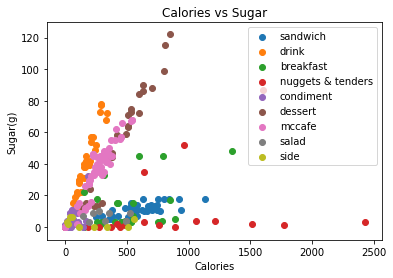

For all data combined: 
y = [ 0.01482726]x + 18.755654905
score: 0.0367226383386


In [4]:
categories = nutr_df['category'].drop_duplicates()
for category in categories:
    temp = nutr_df[nutr_df['category']==category]
    ppl.scatter(temp['calories'],temp['sugar_g'], label = category)
    reg = LinearRegression().fit(np.array(temp['calories']).reshape(-1,1),temp['sugar_g'])
    m = reg.coef_
    b = reg.intercept_
    #ppl.plot(nutr_df['calories'],(m*nutr_df['calories'])+b,c='r')
    print('For '+category)
    print('y = '+str(m)+"x + "+str(b))
    print('score: ' + str(reg.score(np.array(temp['calories']).reshape(-1,1),temp['sugar_g'])))
    print()

ppl.legend()
ppl.title('Calories vs Sugar')
ppl.xlabel('Calories')
ppl.ylabel('Sugar(g)')
ppl.show()

reg = LinearRegression().fit(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['sugar_g'])
m = reg.coef_
b = reg.intercept_
print('For all data combined: ')
print('y = '+str(m)+"x + "+str(b))
print('score: ' + str(reg.score(np.array(nutr_df['calories']).reshape(-1,1),nutr_df['sugar_g'])))


As you were probably expecting, drinks, mccafe items, and desserts make up the top part of the sugar split. It appes that these categories as well as nuggests & tenders, and maybe sandwiches fall into their own linear patterns independent of the rest of the graph. I decided to go ahead and calculate the linear regression models as I plotted the different categories. 

In score values for the new model provide far more information than the basic model did. Drinks, desserts, and mccafe now have scores above 0.8, an incredible improvement from less than 0.05. However, not all of the category-specific models were quite as good. nuggests & tenders, sides, and salads are still around the same score level, but this makes sense. McDonald's offers some healthier option like grilled chicken, but also offered barbeque sauce dipped chicken with loads more sugar, the same goes for salad dressings. Sides are a very diverse category in themselves so it's not surprising that they don't show a strong relationship between calories and sugar content. 

In [5]:
nutr_df['cat_int'] = nutr_df['category']
mapping = dict(zip(categories,range(0,9)))
for i,r in nutr_df.iterrows():
    nutr_df.at[i,'cat_int'] = mapping.get(r['category'])
nutr_df.head()

,Food,calories,calories_from_fat,tot_fat_g,sat_fat_g,trans_fat_g,cholesterol_mg,sodium_mg,carbs_g,fiber_g,sugar_g,protein_g,vitA_pdv,vitC_pdv,calcium_pdv,iron_pdv,category,cat_int
0,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3,11,37,4.0,20.0,20.0,15.0,sandwich,0
1,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2,18,46,6.0,20.0,20.0,30.0,sandwich,0
2,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3,18,70,10.0,20.0,50.0,40.0,sandwich,0
3,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2,18,55,6.0,25.0,20.0,20.0,sandwich,0
4,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4,18,46,6.0,20.0,20.0,20.0,sandwich,0


Now we'll use a Decision Tree to try and predict the classification values of the food items. 

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
nutr_df=nutr_df.dropna()

tree = DecisionTreeClassifier()
X = np.array(nutr_df.drop(columns=['Food','category','cat_int']))
y = np.array(nutr_df[['category']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
tree.fit(X_train,y_train)
print('Decision Tree (Classification) accuracy: ' + str(tree.score(X_test,y_test)))
print(pandas.DataFrame(list(zip(nutr_df.drop(columns=['Food','category','cat_int']),tree.feature_importances_))))

Decision Tree (Classification) accuracy: 0.794871794872
                    0         1
0            calories  0.012511
1   calories_from_fat  0.007065
2           tot_fat_g  0.057340
3           sat_fat_g  0.162101
4         trans_fat_g  0.000000
5      cholesterol_mg  0.052914
6           sodium_mg  0.066028
7             carbs_g  0.064544
8             fiber_g  0.057979
9             sugar_g  0.155436
10          protein_g  0.101976
11           vitA_pdv  0.052670
12           vitC_pdv  0.000000
13        calcium_pdv  0.041836
14           iron_pdv  0.167598


Above we see the accuracy score given by sklearn's .score() function. This reflects the proportion the tree predicted correctly in the test data set after learning from the training data set. We also see the list of all the attributes passed into the tree, and the importance they were given in determining the result. 

We can do the same thing with a Random Forest which functions as a bunch of decisions trees overlayed on one another. This can give a more accurate result by adding in a touch of randomization for each individual tree.

In [7]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
print('Random Forest (Classification) accuracy: '+str(forest.score(X_test,y_test)))
print(pandas.DataFrame(list(zip(nutr_df.drop(columns=['Food','category','cat_int']),forest.feature_importances_))))

Random Forest (Classification) accuracy: 0.846153846154
                    0         1
0            calories  0.060625
1   calories_from_fat  0.059830
2           tot_fat_g  0.051541
3           sat_fat_g  0.059555
4         trans_fat_g  0.000000
5      cholesterol_mg  0.096829
6           sodium_mg  0.113592
7             carbs_g  0.096192
8             fiber_g  0.077137
9             sugar_g  0.081794
10          protein_g  0.091201
11           vitA_pdv  0.046634
12           vitC_pdv  0.039787
13        calcium_pdv  0.054960
14           iron_pdv  0.070322


The results here are similar, but still different from the previous algorithm. We see a little higher accuracy, and different importance levels. It is important to remember that both of these values depend on what is passed in to train with. Here I am using train_test_split from sklearn.model_selection so my dataset is being split randomly everytime the code compiles. The DecisionTree and my RandomForest are using the same data sets per run though so these values are compareable. 

The previous two calculations show us examples of supervised machine learning for classfication. We can also use decision trees and random forests for regression, meaning we can use them to estimate numeric values. 

In [8]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
X = np.array(nutr_df.drop(columns=['Food','calories','category','calories_from_fat']))
y = np.array(nutr_df[['calories']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
tree.fit(X_train,y_train)
print('Decision Tree (Regression) Accuracy: '+str(tree.score(X_test,y_test)))
print(pandas.DataFrame(list(zip(nutr_df.drop(columns=['Food','calories','category','calories_from_fat']),tree.feature_importances_))))

Decision Tree (Regression) Accuracy: 0.923749963272
                 0         1
0        tot_fat_g  0.823231
1        sat_fat_g  0.010250
2      trans_fat_g  0.000000
3   cholesterol_mg  0.002763
4        sodium_mg  0.000521
5          carbs_g  0.073802
6          fiber_g  0.011193
7          sugar_g  0.067237
8        protein_g  0.007530
9         vitA_pdv  0.000130
10        vitC_pdv  0.001630
11     calcium_pdv  0.000984
12        iron_pdv  0.000486
13         cat_int  0.000242


In [9]:
from sklearn.ensemble import RandomForestRegressor
tree = RandomForestRegressor()
tree.fit(X_train,y_train)
print('Random Forest (Regression) Accuracy: '+str(tree.score(X_test,y_test)))
print(pandas.DataFrame(list(zip(nutr_df.drop(columns=['Food','calories','category','calories_from_fat']),tree.feature_importances_))))

Random Forest (Regression) Accuracy: 0.974716193382
                 0         1
0        tot_fat_g  0.614017
1        sat_fat_g  0.002920
2      trans_fat_g  0.000102
3   cholesterol_mg  0.081516
4        sodium_mg  0.128657
5          carbs_g  0.089782
6          fiber_g  0.003544
7          sugar_g  0.017245
8        protein_g  0.048145
9         vitA_pdv  0.001398
10        vitC_pdv  0.003357
11     calcium_pdv  0.005844
12        iron_pdv  0.002379
13         cat_int  0.001092


Again we can see that the Random Forest gives us the edge in accuracy. This comes at the cost of being slower to calculate, but on a small dataset like this the amount is negligible. Now let's try this on the information we have available from a menu that we have in our dataset--Food name, calories, and category. 

We are going to take a simpified approach to recognizing the words of the Food name. You could employ Natural Language Processing to determine the meaning of different words and how those meanings match up with other information, but here we will be creating a series of dummy variables based on regular expressions that have been passed over the Food name strings.

In [10]:
menu_df = nutr_df[['Food','calories', 'category','cat_int']]
menu_df['chicken'] = menu_df['Food'].str.contains('[cC]hicken',regex=True)
menu_df['burger'] = menu_df['Food'].str.contains('[bB]urger',regex=True)
menu_df['milkshake'] = menu_df['Food'].str.contains('milkshake',regex=True)
menu_df['grilled'] = menu_df['Food'].str.contains('[gG]rilled',regex=True)
menu_df.head()

,Food,calories,category,cat_int,chicken,burger,milkshake,grilled
0,Artisan Grilled Chicken Sandwich,380,sandwich,0,True,False,False,True
1,Single Bacon Smokehouse Burger,840,sandwich,0,False,True,False,False
2,Double Bacon Smokehouse Burger,1130,sandwich,0,False,True,False,False
3,Grilled Bacon Smokehouse Chicken Sandwich,750,sandwich,0,True,False,False,True
4,Crispy Bacon Smokehouse Chicken Sandwich,920,sandwich,0,True,False,False,False


The above DataFrame, menu_df, now contains this information for every item. Now we will see if we can use this information to guess total_fat, saturated fat, and sugar using a Random Forest like we did before. 

In [11]:
tree = RandomForestRegressor()
X = np.array(menu_df.drop(columns=['Food','category']))
y = np.array(nutr_df[['tot_fat_g']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
tree.fit(X_train,y_train)
tree.fit(X_train,y_train)
print('Random Forest (Regression) Accuracy in guess total fat(g): '+str(tree.score(X_test,y_test)))
print(pandas.DataFrame(list(zip(menu_df.drop(columns=['Food','category']),tree.feature_importances_))))

tree = RandomForestRegressor()
X = np.array(menu_df.drop(columns=['Food','category']))
y = np.array(nutr_df[['sat_fat_g']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
tree.fit(X_train,y_train)
tree.fit(X_train,y_train)
print('Random Forest (Regression) Accuracy in estimating saturated fat(g): '+str(tree.score(X_test,y_test)))
print(pandas.DataFrame(list(zip(menu_df.drop(columns=['Food','category']),tree.feature_importances_))))

tree = RandomForestRegressor()
X = np.array(menu_df.drop(columns=['Food','category']))
y = np.array(nutr_df[['sugar_g']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
tree.fit(X_train,y_train)
tree.fit(X_train,y_train)
print('Random Forest (Regression) Accuracy in estimating sugar(g): '+str(tree.score(X_test,y_test)))
print(pandas.DataFrame(list(zip(menu_df.drop(columns=['Food','category']),tree.feature_importances_))))


Random Forest (Regression) Accuracy in guess total fat(g): 0.883957764443
           0         1
0   calories  0.960709
1    cat_int  0.028988
2    chicken  0.004013
3     burger  0.001327
4  milkshake  0.004411
5    grilled  0.000552
Random Forest (Regression) Accuracy in estimating saturated fat(g): 0.825330631654
           0         1
0   calories  0.847191
1    cat_int  0.110129
2    chicken  0.034441
3     burger  0.005265
4  milkshake  0.002000
5    grilled  0.000975
Random Forest (Regression) Accuracy in estimating sugar(g): 0.833143517778
           0         1
0   calories  0.493556
1    cat_int  0.284558
2    chicken  0.116248
3     burger  0.005738
4  milkshake  0.099856
5    grilled  0.000043


They all seem to provide relatively descent estimates. They appear to rely most on calories and category (cat_int). This makes sense because the category helps determine the expected amounts of different nutrients like we saw with sugar earlier, and calories helps to predict the amount specifically. Let's try one more, fiber, whose regression model had a fairly low score. 

In [12]:
tree = RandomForestRegressor()
X = np.array(menu_df.drop(columns=['Food','category']))
y = np.array(nutr_df[['fiber_g']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
tree.fit(X_train,y_train)
tree.fit(X_train,y_train)
print('Random Forest (Regression) Accuracy in estimating fiber(g): '+str(tree.score(X_test,y_test)))
print(pandas.DataFrame(list(zip(menu_df.drop(columns=['Food','category']),tree.feature_importances_))))

Random Forest (Regression) Accuracy in estimating fiber(g): 0.673475698402
           0         1
0   calories  0.532446
1    cat_int  0.304017
2    chicken  0.136188
3     burger  0.001646
4  milkshake  0.020975
5    grilled  0.004727


This is much less accurate than the other models, but let's see if we can improve it being adding another word variable. 

In [13]:
menu_df['salad'] = menu_df['Food'].str.contains('[sS]alad',regex=True)
tree = RandomForestRegressor()
X = np.array(menu_df.drop(columns=['Food','category']))
y = np.array(nutr_df[['fiber_g']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
tree.fit(X_train,y_train)
tree.fit(X_train,y_train)
print('Random Forest (Regression) Accuracy in estimating fiber(g): '+str(tree.score(X_test,y_test)))
print(pandas.DataFrame(list(zip(menu_df.drop(columns=['Food','category']),tree.feature_importances_))))


Random Forest (Regression) Accuracy in estimating fiber(g): 0.573788306818
           0         1
0   calories  0.598737
1    cat_int  0.284771
2    chicken  0.029932
3     burger  0.001164
4  milkshake  0.044778
5    grilled  0.004741
6      salad  0.035876


That change looks like it might have helped improve accuracy some, but given the limited number of items in the dataset containing the word "salad" it's not surprising this didn't have a strong effect. To be able to predict things more accuratley we would dive deeper into Machine Learning, potentially using [Neural Networks](https://skymind.ai/wiki/neural-network) and [Natural Language Processing](https://towardsdatascience.com/introduction-to-nlp-5bff2b2a7170) to further assess the impact different words seem to have on nutritional content. 

Now you know how to scrape data, organize and clean it (although this will be a unique process for every data set), visualize it, use linear regression to make linear estimations, and create Decision Trees and Random Forests to let machine learning find those relationships for you. There is still a vast amount to learn about Data Science and Machine Learning. I especially recomend you check out [this](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) diagram from sklearn to see the options provided by just one module.

Documentation for Modules and Packages Used
1. [requests](http://docs.python-requests.org/en/master/)
2. [pandas](https://pandas.pydata.org/)
3. [numpy](http://www.numpy.org/)
4. [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) from bs4 
5. [matplotlib](https://matplotlib.org/index.html)
6. [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn.linear_model
7. [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from sklearn.model_selection 
8. [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) from sklearn.tree 
9. [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from sklearn.tree 
10. [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) from sklearn.ensemble
11. [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) from sklearn.ensemble 


More information about modules you might be interested in:
- Natural Language Processing: [article](https://medium.com/activewizards-machine-learning-company/comparison-of-top-6-python-nlp-libraries-c4ce160237eb), [TensorFlow](https://www.tensorflow.org/)
- Data Visualization: [ggplot](https://ggplot2.tidyverse.org/index.html), [seaborn](https://seaborn.pydata.org/), and many many more.

If there is another topic you are especially interested in I encourage you to hop on your favorite search engine and find out what is out there for you to explore.    --Erin Nordquist
